# Find the clusters intra consistency with 100% confidence

In [32]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

## Get Lineage for a given species assignment

In [3]:
lineage = ncbi.get_lineage(9606)
print (lineage)

[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314295, 9604, 207598, 9605, 9606]


In [5]:
names = ncbi.get_taxid_translator(lineage)
print ([names[taxid] for taxid in lineage])

['root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Deuterostomia', 'Chordata', 'Craniata', 'Vertebrata', 'Gnathostomata', 'Teleostomi', 'Euteleostomi', 'Sarcopterygii', 'Dipnotetrapodomorpha', 'Tetrapoda', 'Amniota', 'Mammalia', 'Theria', 'Eutheria', 'Boreoeutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Simiiformes', 'Catarrhini', 'Hominoidea', 'Hominidae', 'Homininae', 'Homo', 'Homo sapiens']


## Get rank

In [6]:
print (ncbi.get_rank([9606, 9443]))


{9443: 'order', 9606: 'species'}


## Example cluster
- 10000001:1076524=1;1524468=1;666685=1



In [43]:
def find_common(cluster_lineage, min_lineage):
    level_set=set()
    for j in reversed(range(min_lineage)):
        level_set.clear()
        for i in range(len(cluster_lineage)):
            level_set.add(cluster_lineage[i][j])
        if len(level_set)==1:
            print (str(level_set))
            return level_set.pop()
            
cluster_info = "10000001:1076524=1;1524468=1;666685=1"
tmp = cluster_info.split(":")[1]
taxas = tmp.split(";")
for taxa in taxas:
    tax_name = taxa[:taxa.index("=")]
    print (tax_name)


            
            
lineage_length =[]
cluster_lineage = []
lin1= ncbi.get_lineage(1076524)
lineage_length.append(len(lin1))
cluster_lineage.append(lin1)

lin2= ncbi.get_lineage(1524468)
lineage_length.append(len(lin2))
cluster_lineage.append(lin2)

lin3= ncbi.get_lineage(666685)
lineage_length.append(len(lin3))
cluster_lineage.append(lin3)

print (ncbi.get_lineage(1076524))
print (ncbi.get_lineage(1524468))
print (ncbi.get_lineage(666685))

print(lineage_length)
min_lineage = min(lineage_length)
print(min(lineage_length))

print(cluster_lineage)

common_taxa = find_common(cluster_lineage, min_lineage)
common_taxa_name = ncbi.get_taxid_translator([common_taxa])
common_taxa_rank = ncbi.get_rank([common_taxa])
print(type(common_taxa))
print (common_taxa, common_taxa_name, common_taxa_rank)


    

    


1076524
1524468
666685
[1, 131567, 2, 1224, 1236, 135614, 1775411, 75309, 2621553, 1076524]
[1, 131567, 2, 1224, 1236, 135614, 1775411, 75309, 2621553, 1524468]
[1, 131567, 2, 1224, 1236, 135614, 1775411, 75309, 666685]
[10, 10, 9]
9
[[1, 131567, 2, 1224, 1236, 135614, 1775411, 75309, 2621553, 1076524], [1, 131567, 2, 1224, 1236, 135614, 1775411, 75309, 2621553, 1524468], [1, 131567, 2, 1224, 1236, 135614, 1775411, 75309, 666685]]
{75309}
<class 'int'>
75309 {75309: 'Rhodanobacter'} {75309: 'genus'}


In [15]:
sub13 = [x1 - x2 for (x1, x2) in zip(lin1, lin3)]
print(sub13)

[0, 0, 0, 0, 0, 0, 0, 0, 1954868]


In [11]:
print (type(lin1))

<class 'list'>


In [5]:
from ete3 import NCBITaxa, PhyloTree, Tree, faces, AttrFace, TreeStyle, TextFace
ncbi = NCBITaxa()

tree = ncbi.get_topology([9606, 9598, 10090, 7707, 8782])
print (tree.get_ascii(attributes=["sci_name", "rank"]))


                      /-Dendrochirotida, order
                     |
                     |                                                                /-Homo sapiens, species
-Deuterostomia, no rank                                           /Homininae, subfamily
                     |                /Euarchontoglires, superorder                   \-Pan troglodytes, species
                     |               |                           |
                      \Amniota, no rank                           \-Mus musculus, species
                                     |
                                      \-Aves, class



                                                       /-Rhodanobacter sp. FW104-R5, species
                    /unclassified Rhodanobacter, no rank
-Rhodanobacter, genus                                  \-Rhodanobacter sp. OR92, species
                   |
                    \-Rhodanobacter denitrificans, species


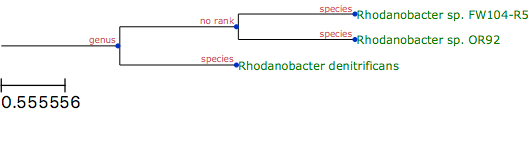

In [18]:
tax_list = [1076524, 1524468, 666685
]
tree = ncbi.get_topology(tax_list, intermediate_nodes=False)


# custom layout: adds "rank" on top of branches, and sci_name as tip names
def my_layout(node):
    if getattr(node, "rank", None):
        rank_face = AttrFace("rank", fsize=7, fgcolor="indianred")
        node.add_face(rank_face, column=0, position="branch-top")
    if node.is_leaf():
        sciname_face = AttrFace("sci_name", fsize=9, fgcolor="green")
        node.add_face(sciname_face, column=0, position="branch-right")
ts = TreeStyle()
ts.layout_fn = my_layout
ts.show_leaf_name = False

print (tree.get_ascii(attributes=["sci_name", "rank"]))


# tree.render("tree.png", tree_style=ts)
tree.render("%%inline", w=150, units="mm", tree_style=ts)
